## Imports

In [115]:
import re
import requests
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from matplotlib import dates
%matplotlib inline
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Web Scraping

In [116]:
# Getting HTML data from 'worldometer.com', parsing it and using the main table on the page.
mainPage = requests.get("https://www.worldometers.info/coronavirus/")
soup = BeautifulSoup(mainPage.text, 'html.parser')
results = soup.find(id='main_table_countries_today')

# From the main table getting data cells represented as "td", which includes all numbers from HTML script.
content = results.find_all('td')

# Data cleansing part, putting the parsed HTML data in a better shape.
new_data = ""
for data in content:
    new_data += data.text.strip() + "|"

new_data = new_data.replace("+", "")
new_data = new_data.replace("N/A", "0")

# Giving a country name to acquire its data and showing it. (Default value is set to 'Turkey')
def current_data(country='Turkey'):
    # Looking for a specific country.
    pattern = country+"[,|\d]*"
    data = re.search(pattern, new_data, re.IGNORECASE)

    # Putting the country's numbers in an array.
    allInfo = [data.group().split('|')]
    final = allInfo[0]

    # Printing numbers.
    print('For ' + country + ';\n')
    print('Total COVID-19 Cases: ' + final[1])
    print('Total Deaths: ' + final[3])
    print('Total Recoveries: ' + final[5])
    print('New Cases Today: ' + final[2])
    print('New Deaths Today: ' + final[4])
    print('Active Cases: ' + final[7])
    print('Critical Cases: ' + final[8])
    print('Total Tests: ' + final[11] + '\n\n')
    
current_data()    
current_data('Canada')
current_data('France')

For Turkey;

Total COVID-19 Cases: 467,730
Total Deaths: 12,840
Total Recoveries: 385,480
New Cases Today: 
New Deaths Today: 
Active Cases: 69,410
Critical Cases: 4,641
Total Tests: 17,733,520


For Canada;

Total COVID-19 Cases: 347,466
Total Deaths: 11,710
Total Recoveries: 277,232
New Cases Today: 
New Deaths Today: 
Active Cases: 58,524
Critical Cases: 449
Total Tests: 11,090,768


For France;

Total COVID-19 Cases: 2,170,097
Total Deaths: 50,618
Total Recoveries: 156,552
New Cases Today: 
New Deaths Today: 
Active Cases: 1,962,927
Critical Cases: 4,148
Total Tests: 20,098,815




## Analysing CSV data

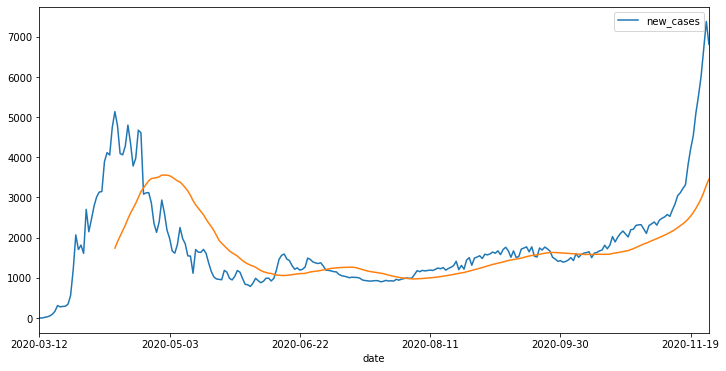

In [117]:
# Getting data on COVID-19 by "Our World in Data"
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
owid_df = pd.read_csv(url, error_bad_lines=False)

# Getting the given country's requested information type. Default values are set to 'Turkey' and 'new cases'
# You can see the information type options by typing 'owid_df.columns'
def plot_data(country='Turkey', col='new_cases'):
    
    # Getting the country's index
    indexer = owid_df[owid_df['location']==country].index

    # Getting date and requested information.
    total = owid_df.loc[indexer, 'date':col]

    # Deleting NaN values
    total = total.dropna()

    # Setting date as index, dropping unrequested columns and plotting.
    total.set_index('date', inplace=True)
    total.drop(total.columns.difference([col]), 1, inplace=True)
    total.plot(figsize=(12,6))

    # Plotting a 30 day moving average (orange line). 
    # It is better if the current numbers are less than average for that day, and vice versa.
    total.rolling(window=30).mean()[col].plot()

# owid_df.columns
plot_data('Turkey', 'new_cases')

## Does smoking really effect death rates?

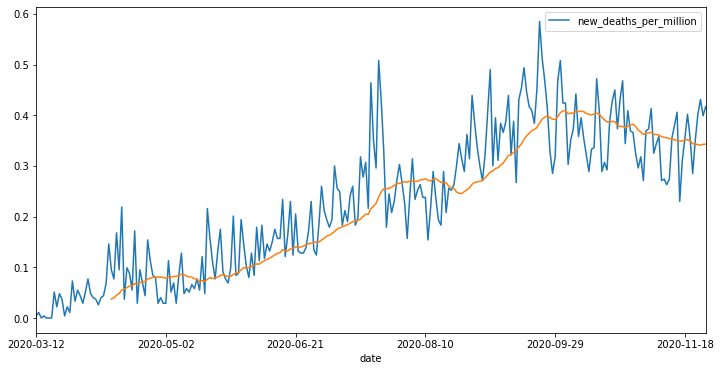

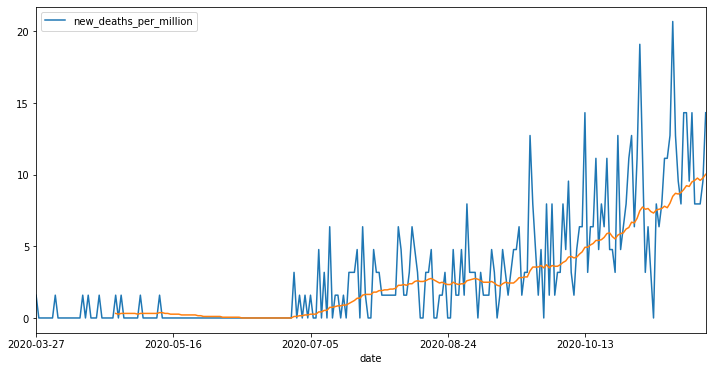

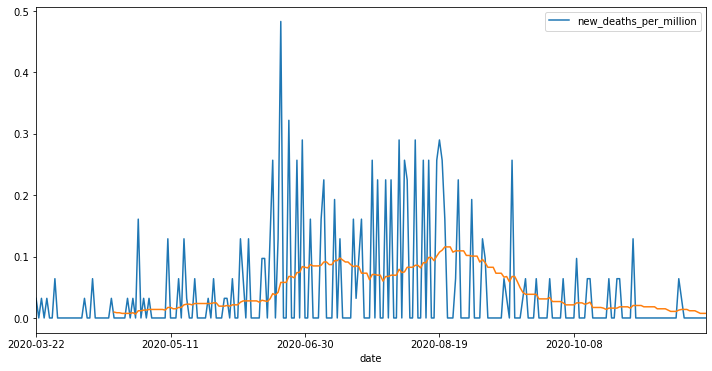

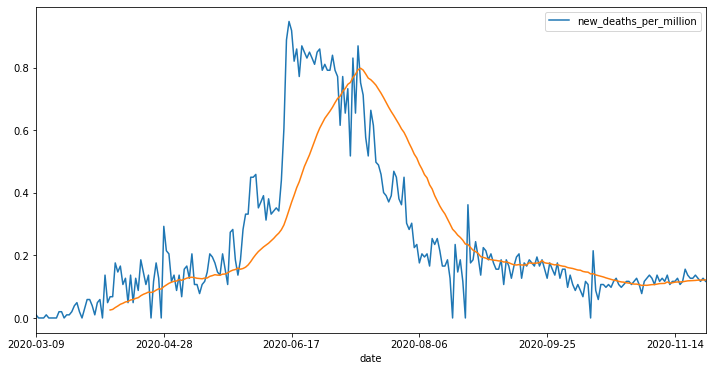

In [118]:
# Countries with highest smoking rates, and their death counts per million.
plot_data('Indonesia', 'new_deaths_per_million')
plot_data('Montenegro', 'new_deaths_per_million')

# Countries with lowest smoking rates, and their death counts per million.
plot_data('Ghana', 'new_deaths_per_million')
plot_data('Egypt', 'new_deaths_per_million')

In [119]:
# Getting date and 2 columns of information for every country.
def scatter_plot(date, col1, col2):
    
    # Getting unique country names and building a DataFrame.
    countries = owid_df.location.unique()
    totals = pd.DataFrame(columns = ['date', 'location', col1, col2])
    
    # Getting every country's data and appending them to the DataFrame.
    for country in countries:
        temp = owid_df[(owid_df['location']==country) & (owid_df['date']==date)][['date', 'location', col1, col2]]
        totals = totals.append(temp, ignore_index = True).fillna(0)
    totals.set_index('date', inplace=True)
    
    # Creating Plotly scatter plot.
    sPlot = px.scatter(data_frame=totals, x=col2, 
                     y=col1, color="location", trendline="ols",
                 hover_data=['location'])
    sPlot.show()
    
    return totals

# Plotting male smokers and total deaths per million. (Most smoker countries: Indonesia, Tunusia, Russia) 
scatter_plot('2020-11-25', 'total_deaths_per_million', 'male_smokers')

# Plotting female smokers and total deaths per million. (Most smoker countries: Montenegro, Serbia, Greece) 
scatter_plot('2020-11-25', 'total_deaths_per_million', 'female_smokers')

,location,total_deaths_per_million,female_smokers
date,,,
2020-11-25,Aruba,421.482,0.000
2020-11-25,Afghanistan,44.312,0.000
2020-11-25,Angola,10.254,0.000
2020-11-25,Anguilla,0.000,0.000
2020-11-25,Albania,255.403,7.100
...,...,...,...
2020-11-25,South Africa,355.479,8.100
2020-11-25,Zambia,19.419,3.100
2020-11-25,Zimbabwe,18.435,1.600
